In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

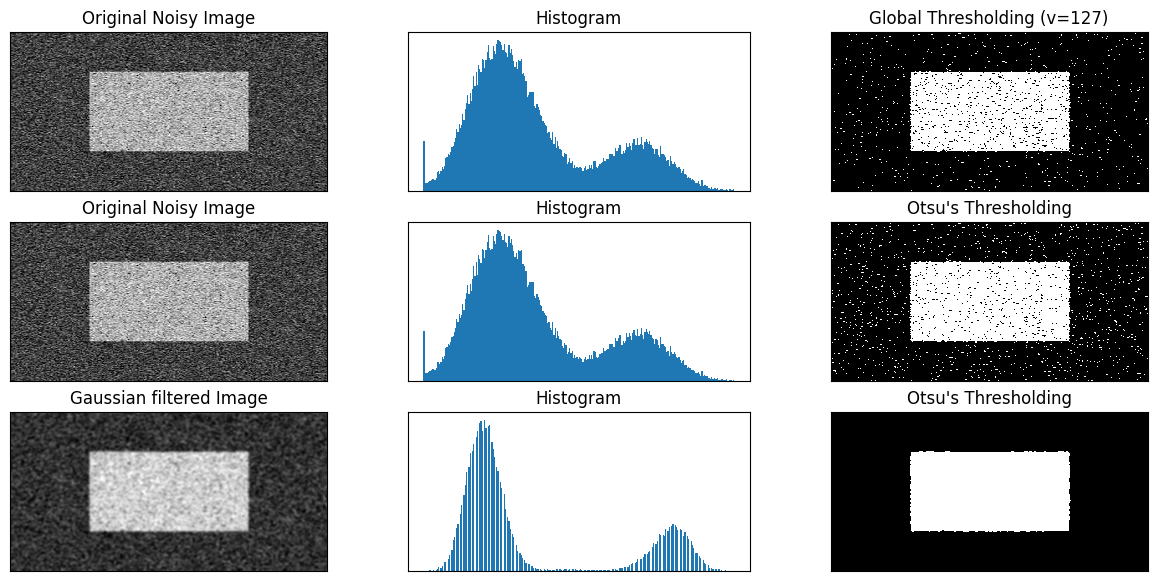

In [3]:
# original image
img = cv2.imread('images/noisy.jpg', 0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img, (5,5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=[15,7])
for i in range(3):
    #first column
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], 'gray'),
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    #second column
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])

    #third column
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

In [5]:
'''
ADAPTIVE THRESHOLDING:
In the previous section, we used one global value as a threshold. 
But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. 
In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it
'''

'\nADAPTIVE THRESHOLDING:\nIn the previous section, we used one global value as a threshold. \nBut this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. \nIn that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it\n'

Text(0.5, 1.0, 'Adaptive Gaussian + noise removal')

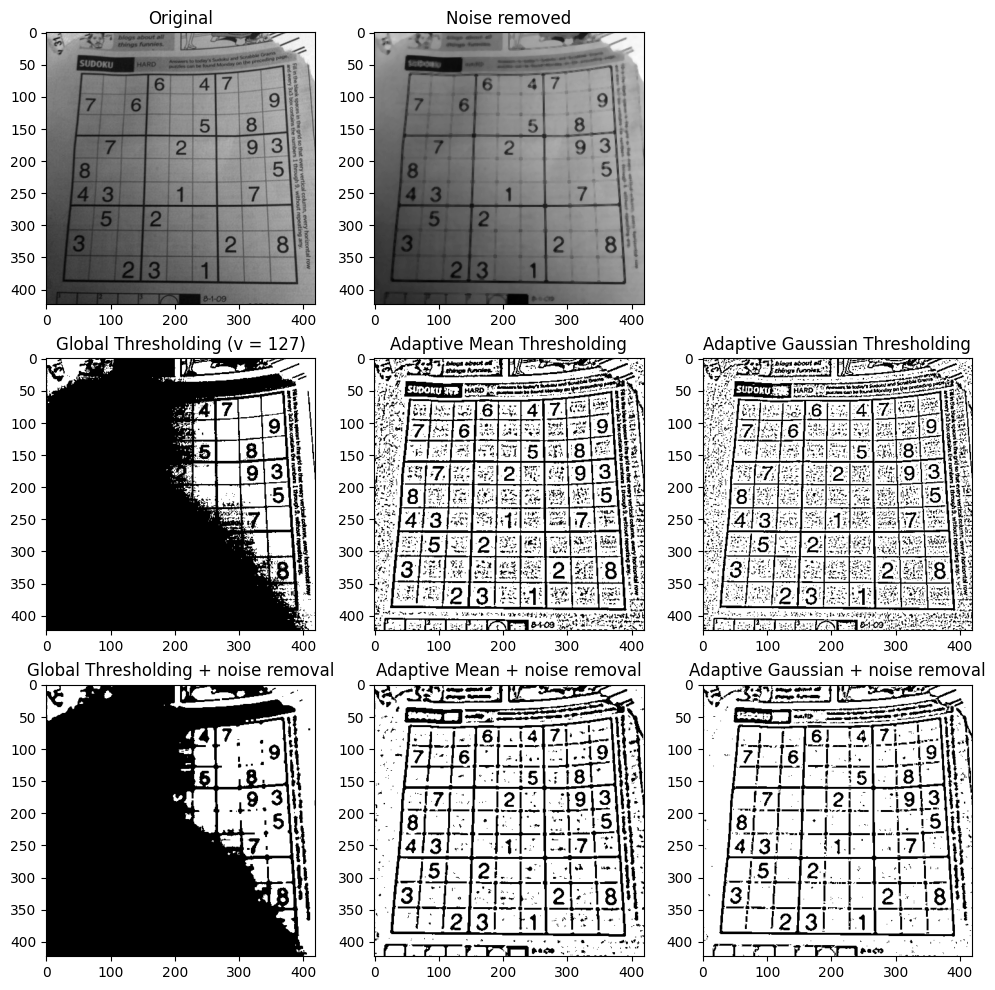

In [11]:
# Load our new image
original_image = cv2.imread('images/sudoku.jpg', 0)

#Noise removal
noise_removed_image = cv2.medianBlur(original_image,5)# or cv2.GaussianBlur(original_image,(5,5),0)

_,output1 = cv2.threshold(original_image,127,255,cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output3 = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

_,output4 = cv2.threshold(noise_removed_image,127,255,cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output6 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

plt.figure(figsize=[12,12])
plt.subplot(331); plt.imshow(original_image, cmap='gray'); plt.title("Original")
plt.subplot(332); plt.imshow(noise_removed_image, cmap='gray'); plt.title("Noise removed")
 
plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title("Global Thresholding (v = 127)")
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Mean Thresholding")
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian Thresholding")
  
plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title("Global Thresholding + noise removal")
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title("Adaptive Mean + noise removal")
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title("Adaptive Gaussian + noise removal")